# Initialization

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('stroke_prediction_dataset.csv')

In [2]:
# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

Original Dataset:
   Patient ID       Patient Name  Age Gender  Hypertension  Heart Disease  \
0       18153    Mamooty Khurana   56   Male             0              1   
1       62749  Kaira Subramaniam   80   Male             0              0   
2       32145      Dhanush Balan   26   Male             1              1   
3        6154        Ivana Baral   73   Male             0              0   
4       48973  Darshit Jayaraman   51   Male             1              1   

  Marital Status      Work Type Residence Type  Average Glucose Level  ...  \
0        Married  Self-employed          Rural                 130.91  ...   
1         Single  Self-employed          Urban                 183.73  ...   
2        Married   Never Worked          Rural                 189.00  ...   
3        Married   Never Worked          Urban                 185.29  ...   
4       Divorced  Self-employed          Urban                 177.34  ...   

     Alcohol Intake Physical Activity Stroke Histo

In [3]:
# Drop unnecessary columns
df = df.drop (['Patient Name', 'Gender', 'Marital Status', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Dietary Habits', 'Cholesterol Levels', 'Symptoms', 'Blood Pressure Levels'], axis=1)

In [4]:
# Map 'Diagnosis' column to boolean values (1 for 'Stroke' and 0 for 'No Stroke')
df['Diagnosis'] = df['Diagnosis'].map({'Stroke': 1, 'No Stroke': 0})

# Map 'Family History of Stroke' column to boolean values (1 for 'Yes' and 0 for 'No')
df['Family History of Stroke'] = df['Family History of Stroke'].map({'Yes': 1, 'No': 0})


In [5]:
# Statistical Analysis
summary_statistics = df.describe()

print("\nSummary Statistics:")
print(summary_statistics)


Summary Statistics:
         Patient ID           Age  Hypertension  Heart Disease  \
count  14999.000000  14999.000000  14999.000000   14999.000000   
mean   49716.537236     54.037402      0.248950       0.502967   
std    29001.483968     21.062740      0.432419       0.500008   
min        1.000000     18.000000      0.000000       0.000000   
25%    24561.000000     36.000000      0.000000       0.000000   
50%    49449.000000     54.000000      0.000000       1.000000   
75%    75116.000000     72.000000      0.000000       1.000000   
max    99975.000000     90.000000      1.000000       1.000000   

       Average Glucose Level  Body Mass Index (BMI)  Stroke History  \
count           14999.000000           14999.000000    14999.000000   
mean              129.448939              27.474784        0.500233   
std                40.486564               7.230200        0.500017   
min                60.000000              15.010000        0.000000   
25%                94.525000 

In [6]:
# Display the preprocessed dataset
print("\nPreprocessed Dataset:")
print(df.head())


Preprocessed Dataset:
   Patient ID  Age  Hypertension  Heart Disease  Average Glucose Level  \
0       18153   56             0              1                 130.91   
1       62749   80             0              0                 183.73   
2       32145   26             1              1                 189.00   
3        6154   73             0              0                 185.29   
4       48973   51             1              1                 177.34   

   Body Mass Index (BMI)  Stroke History  Family History of Stroke  \
0                  22.37               0                         1   
1                  32.57               0                         0   
2                  20.32               0                         1   
3                  27.50               0                         0   
4                  29.06               0                         1   

   Stress Levels  Diagnosis  
0           3.48          1  
1           1.73          1  
2           7.31     

c:\Users\Van\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Van\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Van\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


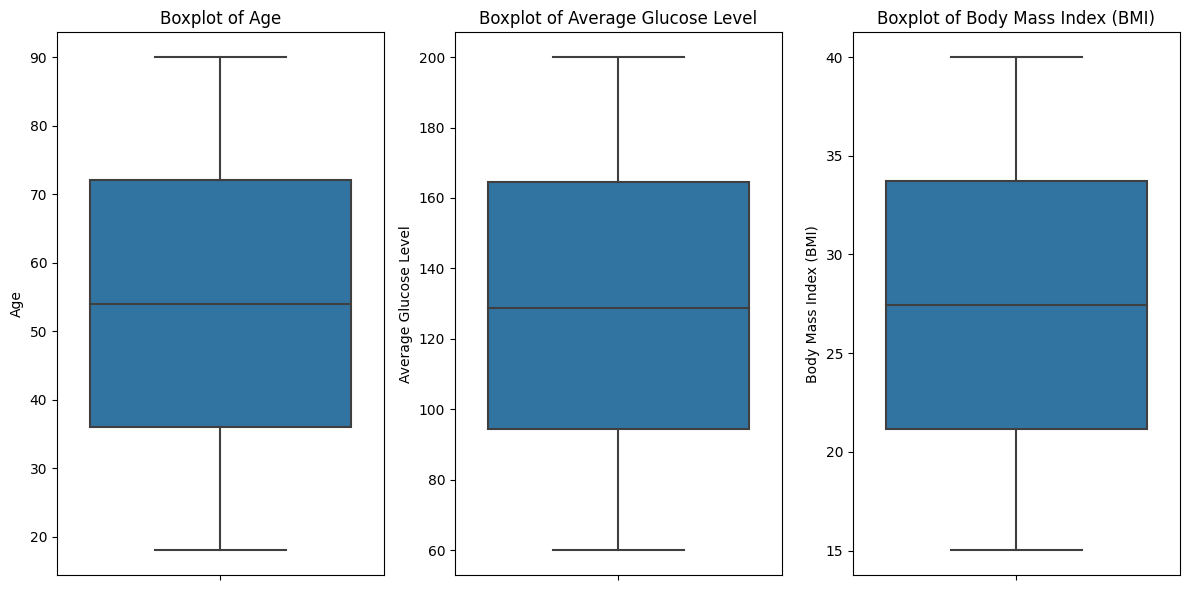

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display box plots for numerical features to check for outliers
numerical_features = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [8]:
# Display the class distribution before sampling
print("Class Distribution Before Sampling:")
print(df['Diagnosis'].value_counts())

Class Distribution Before Sampling:
Diagnosis
0    7531
1    7468
Name: count, dtype: int64


In [9]:
# Randomly sample 80% of the majority class ('No Stroke') to balance the dataset
class_0_samples = df[df['Diagnosis'] == 0].sample(frac=0.8, random_state=42)

# Include all samples from the minority class ('Stroke')
class_1_samples = df[df['Diagnosis'] == 1]

In [10]:
# Concatenate the sampled data
df_sampled = pd.concat([class_0_samples, class_1_samples])

# Shuffle the dataset
df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)


In [11]:
# Display the class distribution after sampling
print("\nClass Distribution After Sampling:")
print(df_sampled['Diagnosis'].value_counts())


Class Distribution After Sampling:
Diagnosis
1    7468
0    6025
Name: count, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [13]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Display the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (11999, 9)
X_test shape: (3000, 9)
y_train shape: (11999,)
y_test shape: (3000,)


c:\Users\Van\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Van\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Van\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


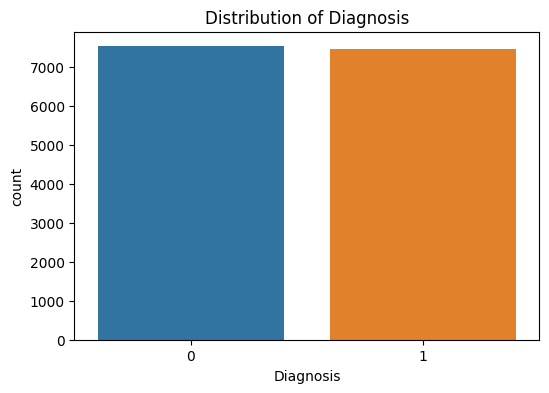

c:\Users\Van\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Van\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


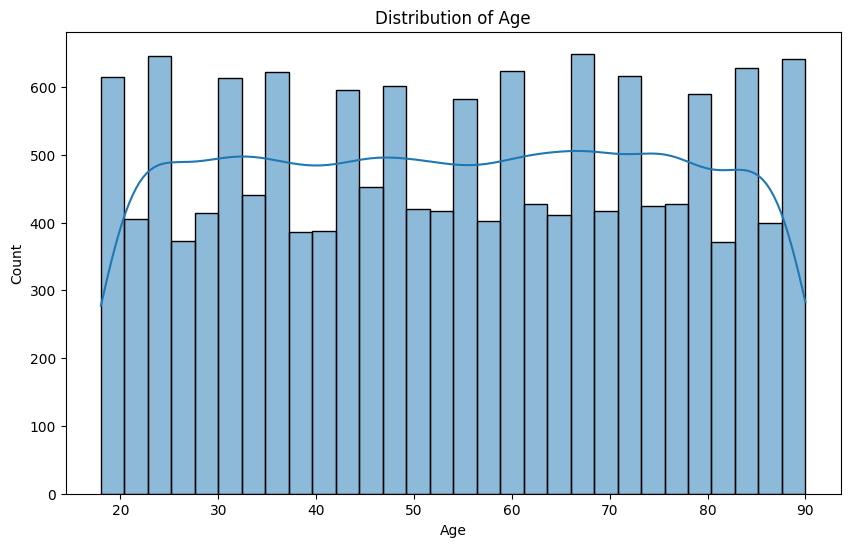

c:\Users\Van\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Van\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Van\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Van\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

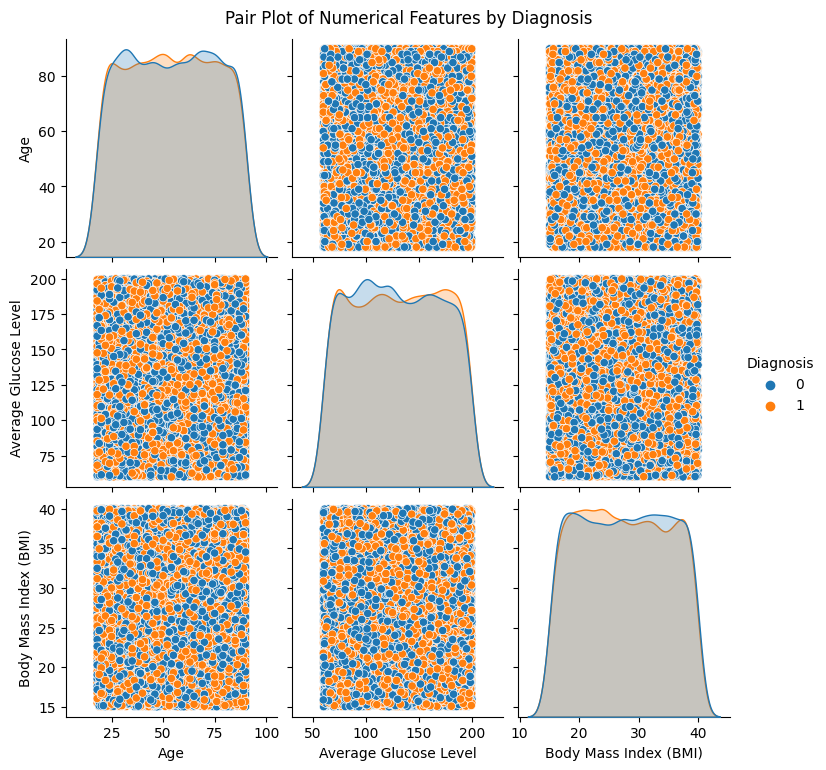

In [15]:
# Display the distribution of the 'Diagnosis' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()

# Display the distribution of the 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=df, bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# Display a pair plot of numerical features colored by 'Diagnosis'
numerical_features = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)']
sns.pairplot(df, hue='Diagnosis', vars=numerical_features)
plt.suptitle('Pair Plot of Numerical Features by Diagnosis', y=1.02)
plt.show()

In [18]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, r2_score, confusion_matrix
from sklearn.neural_network import MLPClassifier

# Separate features (X) and target variable (y)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [20]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
model = MLPClassifier(random_state=42)
model.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [22]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [23]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.498


In [24]:
# Calculate F1 Score
f1 = round(f1_score(y_test, y_pred), 3)
print(f'F1 Score: {f1}')

F1 Score: 0.011


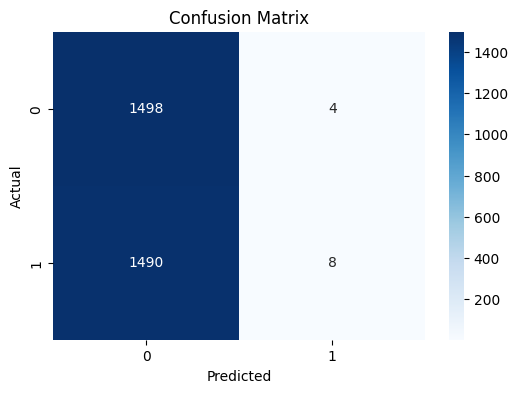

In [25]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [67]:
# Calculate cross-validation score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print(f'Cross-Validation F1 Score: {cv_scores.mean():.3f}')

# Calculate test score
test_score = model.score(X_test, y_test)
print(f'Test Score: {test_score:.3f}')

Cross-Validation F1 Score: 0.268
Test Score: 0.502


# RandomForest

In [68]:
from sklearn.ensemble import RandomForestClassifier
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
# Make predictions on the testing set
y_pred = model.predict(X_test)


In [70]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.3f}')

Mean Squared Error (MSE): 0.501
F1 Score: 0.489


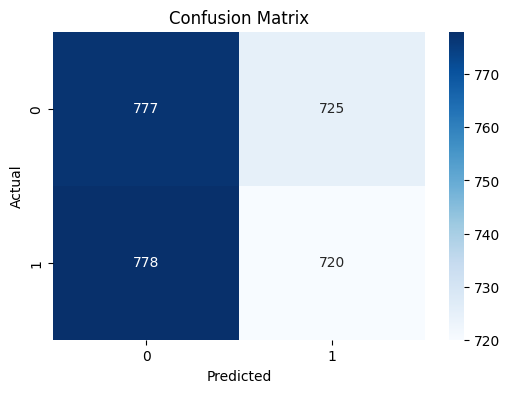

In [71]:
#Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [72]:
# Calculate cross-validation score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print(f'Cross-Validation F1 Score: {cv_scores.mean():.3f}')

# Calculate test score
test_score = model.score(X_test, y_test)
print(f'Test Score: {test_score:.3f}')

Cross-Validation F1 Score: 0.500
Test Score: 0.499


# SVM

In [73]:
from sklearn.svm import SVC

# Separate features (X) and target variable (y)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Support Vector Machine (SVM) classifier
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [74]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [75]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.3f}')

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.3f}')

Mean Squared Error (MSE): 0.510
F1 Score: 0.410


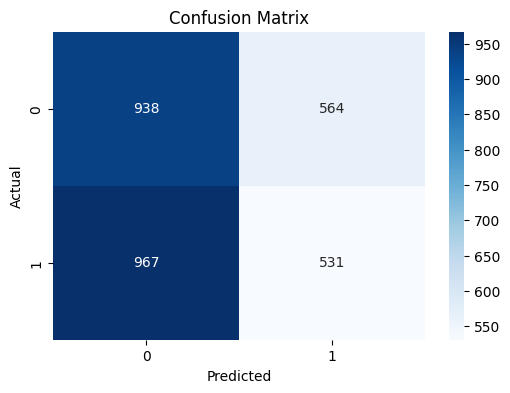

In [76]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [77]:
# Calculate cross-validation score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print(f'Cross-Validation F1 Score: {cv_scores.mean():.3f}')

# Calculate test score
test_score = model.score(X_test, y_test)
print(f'Test Score: {test_score:.3f}')

Cross-Validation F1 Score: 0.227
Test Score: 0.490


# DecisionTree

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Separate features (X) and target variable (y)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [79]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [80]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.3f}')

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.3f}')

Mean Squared Error (MSE): 0.520
F1 Score: 0.476


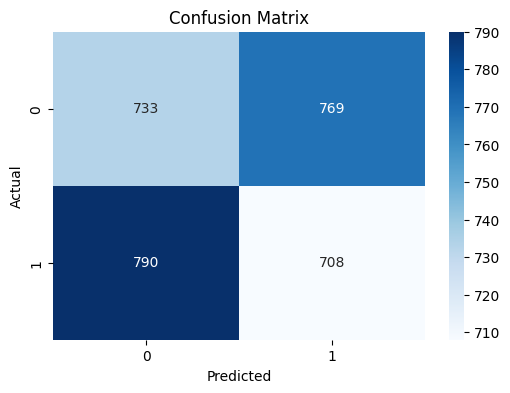

In [81]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [82]:
# Calculate cross-validation score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print(f'Cross-Validation F1 Score: {cv_scores.mean():.3f}')

# Calculate test score
test_score = model.score(X_test, y_test)
print(f'Test Score: {test_score:.3f}')

Cross-Validation F1 Score: 0.497
Test Score: 0.480


# Evaluation

In [97]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features (X) and target variable (y)
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Apply feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [98]:
# Split the scaled dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [99]:
# Initialize and train the Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lr = model_lr.predict(X_test)

In [100]:
# Evaluate Logistic Regression
print("Logistic Regression:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr), 3))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)
print("\n")

Logistic Regression:
Accuracy: 0.523
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.59      0.55      1502
           1       0.53      0.45      0.49      1498

    accuracy                           0.52      3000
   macro avg       0.52      0.52      0.52      3000
weighted avg       0.52      0.52      0.52      3000

Confusion Matrix:
[[888 614]
 [818 680]]




In [101]:
# Repeat the same process for RandomForest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Random Forest:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)
print("\n")

Random Forest:
Accuracy: 0.499
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1502
           1       0.50      0.48      0.49      1498

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

Confusion Matrix:
[[774 728]
 [776 722]]




In [102]:
# Repeat the same process for SVM
model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print("Support Vector Machine (SVM):")
print("Accuracy:", round(accuracy_score(y_test, y_pred_svm), 3))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)
print("\n")

Support Vector Machine (SVM):
Accuracy: 0.493
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.53      0.51      1502
           1       0.49      0.46      0.48      1498

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.49      0.49      0.49      3000

Confusion Matrix:
[[789 713]
 [808 690]]




In [103]:
# Repeat the same process for Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print("Decision Tree:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt), 3))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)

Decision Tree:
Accuracy: 0.479
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.49      0.48      1502
           1       0.48      0.47      0.48      1498

    accuracy                           0.48      3000
   macro avg       0.48      0.48      0.48      3000
weighted avg       0.48      0.48      0.48      3000

Confusion Matrix:
[[730 772]
 [790 708]]


# Fine-Tuning

In [129]:
from sklearn.ensemble import VotingClassifier

# Apply feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train the base models
model_lr = LogisticRegression(random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_svm = SVC(random_state=42)

# Create a Voting Classifier
ensemble_model = VotingClassifier(
    estimators=[
        ('logistic_regression', model_lr),
        ('random_forest', model_rf),
        ('svm', model_svm)
    ],
    voting='hard'  # Use 'hard' voting for classification
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_ensemble = ensemble_model.predict(X_train)

# Make predictions on the testing set
y_pred_test_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
print("Ensemble Model:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_ensemble), 3))
print("Classification Report:")
print(classification_report(y_test, y_pred_ensemble))
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print("Confusion Matrix:")
print(conf_matrix_ensemble)

# Evaluate the ensemble model on the training set
print("Ensemble Model - Training Set:")
print("Accuracy:", round(accuracy_score(y_train, y_pred_train_ensemble), 3))
print("\n")

# Evaluate the ensemble model on the test set
print("Ensemble Model - Test Set:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_test_ensemble), 3))

Ensemble Model:
Accuracy: 0.504
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.55      0.53      1502
           1       0.50      0.46      0.48      1498

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

Confusion Matrix:
[[824 678]
 [809 689]]
Ensemble Model - Training Set:
Accuracy: 0.743


Ensemble Model - Test Set:
Accuracy: 0.504
